# Detection in OpenCV

## Setup Packages

In [ ]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/c/cc/People_in_JHB.jpg

--2023-02-02 16:50:01--  https://upload.wikimedia.org/wikipedia/commons/c/cc/People_in_JHB.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15667848 (15M) [image/jpeg]
Saving to: ‘People_in_JHB.jpg’

People_in_JHB.jpg   100%[===================>]  14.94M  21.3MB/s    in 0.7s    

2023-02-02 16:50:02 (21.3 MB/s) - ‘People_in_JHB.jpg’ saved [15667848/15667848]



In [ ]:
# Read the image to get some values
img = cv2.imread('People_in_JHB.jpg')

img = cv2.resize(img, (128, 64))
img.shape

(64, 128, 3)

## Histogram of Oriented Gradients

Feature Descriptor used in computer vision for object detection. HOGs are used in object recognition to detect the presence and orientation of objects in an image. In OpenCV, the HOG descriptor can be used in conjunction with a machine learning algorithm, such as SVM, to classify objects in an image.

Below uses a pre-trained HOG detector for detecting people in an image

* `cv2.HOGDescriptor_getDefaultPeopleDetector()`

True

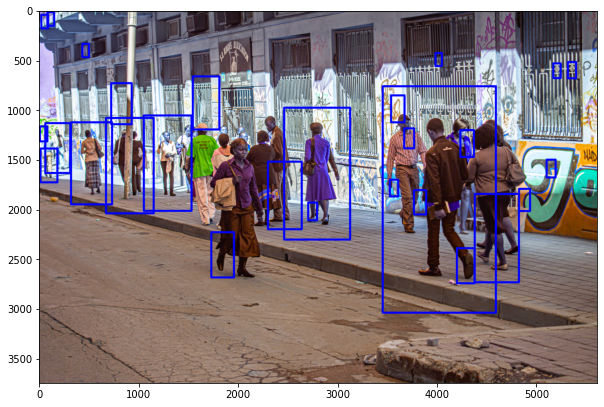

In [ ]:
# Load the HOG classifier
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the image
img = cv2.imread('People_in_JHB.jpg')

# Detect people in the image
boxes, weights = hog.detectMultiScale(img, winStride=(8, 8))

# Draw the bounding boxes around the people
for i, (x, y, w, h) in enumerate(boxes):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 20)

plt.figure(figsize=(10, 20))
plt.imshow(img)

# Save the annotated image
cv2.imwrite("HOG.jpg", img)

# Show the image with the bounding boxes
# cv2.imshow("People Detection", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Additional Parameters for detectMultiScale

https://docs.opencv.org/3.4/d5/d33/structcv_1_1HOGDescriptor.html#a1f631b771af4a3cfa0f2db7ba952e5f4

* `hitThreshold` Threshold for the distance between features and SVM classifying plane
* `winStride` step size in the x and y direction of our sliding window
* `padding` the amount of pixels the ROI is padded with prior to HOG feature vector extraction and SVM classification
* `scale` - scale of the image pyramid (allowing us to detect people in images at multiple scale
* `mean-shift` mean-shift grouping to the detected bounding boxes.


True

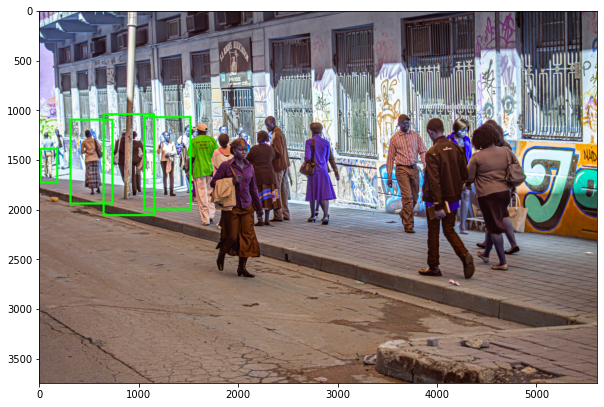

In [ ]:
# Load the HOG classifier
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Reload the image
img = cv2.imread('People_in_JHB.jpg')

# Detect people in the image above a certain threshold
boxes, weights = hog.detectMultiScale(img, winStride=(8, 8), scale=1.05, padding=(0, 0), hitThreshold=0.5)

# Draw the bounding boxes around the people
for i, (x, y, w, h) in enumerate(boxes):
    if weights[i] > 0.5:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 20)
        
# plot the image
plt.figure(figsize=(10, 20))
plt.imshow(img)

# Save the annotated image
cv2.imwrite("HOG_Confidence.jpg", img)

## Haar Cascades

Machine learning-based object detection algorithms. They are designed to detect specific objects or features in images or videos.

* Haarcascades use a Haar-like features extraction method, which is a simple rectangular filter applied to the image, to detect objects or features.

* They are computationally efficient and can be run in real-time on standard hardware.

* Haarcascades are trained using positive and negative samples. Positive samples are images containing the object of interest, and negative samples are images without the object.

* Haarcascades can be used for face detection, body detection, and other object detection tasks.

* Haarcascades are a popular choice for object detection in computer vision due to their simplicity, accuracy, and computational efficiency.



In [ ]:
# Get the classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
!unzip -qq haarcascades.zip

--2023-02-02 16:10:33--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.134
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276350 (270K) [application/zip]
Saving to: ‘haarcascades.zip’

haarcascades.zip    100%[===================>] 269.87K   775KB/s    in 0.3s    

2023-02-02 16:10:34 (775 KB/s) - ‘haarcascades.zip’ saved [276350/276350]



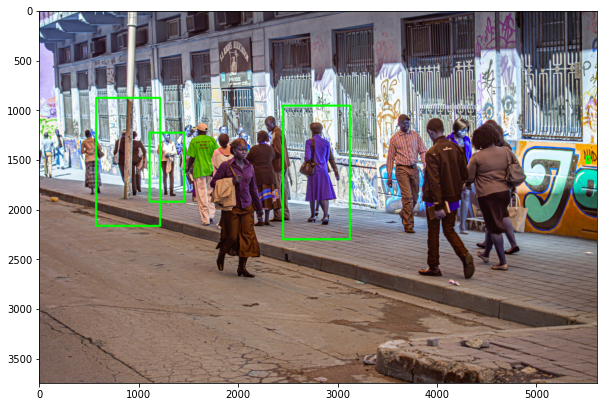

In [ ]:
# Load the Haar cascade classifier
full_body_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Load the image
img = cv2.imread('People_in_JHB.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = full_body_cascade.detectMultiScale(gray, 1.2, 3)

# Draw the bounding boxes around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 20)

# plot the image
plt.figure(figsize=(10, 20))
plt.imshow(img)

# Show the image with the bounding boxes
#cv2.imshow("Face Detection", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## YOLOv3

Bbject detection algorithm that uses a single deep neural network to predict object bounding boxes and class probabilities for objects in an image.

* YOLOv3 uses a convolutional neural network (CNN) to analyze images and predict object locations

* It is designed to be fast and accurate, processing an image in real-time and making predictions for multiple objects in a single pass

* YOLOv3 uses anchor boxes to better handle object detection in varying scales and aspect ratios

* It uses anchor boxes to anchor the bounding box predictions to specific positions and scales

* YOLOv3 has been trained on a large dataset and has achieved state-of-the-art results on several benchmark datasets for object detection

* YOLOv3 can be used for a variety of object detection tasks, including detecting people, cars, and other objects

* YOLOv3 is widely used in a variety of real-world applications, such as autonomous vehicles, video surveillance, and more

In [ ]:
!wget "https://pjreddie.com/media/files/yolov3.weights"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2023-02-02 16:20:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.1MB/s    in 6.3s    

2023-02-02 16:20:57 (37.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2023-02-02 16:20:57--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


In [ ]:
# Load the YOLO model
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

In [ ]:
# determine the output layer
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_82', 'yolo_94', 'yolo_106']

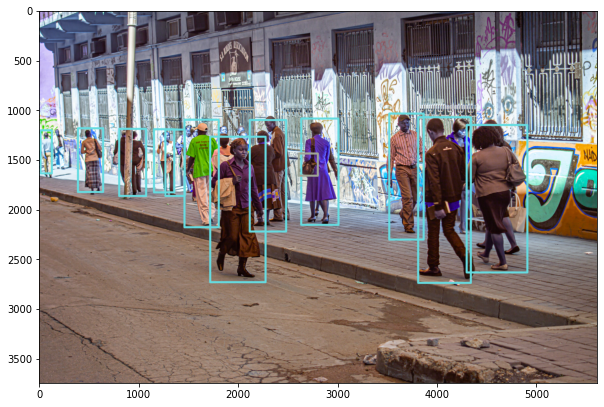

In [ ]:
import requests
import time

numpy.random.seed(42)
colors = numpy.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Load the input image
img = cv2.imread("People_in_JHB.jpg")
height, width, channels = img.shape

# Detect objects in the image
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(ln)

# Show the detections on the image
class_ids, confidences, boxes = [], [], []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = numpy.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maxima suppression to eliminate overlapping detections
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw the detections on the image
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[class_ids[i]]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 20)
        text = "{}: {:.4f}".format(classes[class_ids[i]], confidences[i])
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Show the output image
plt.figure(figsize=(10, 20))
plt.imshow(img)

#cv2.imshow("Image", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()